In [ ]:
import pandas as pd
df = pd.read_csv('imdb.csv')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Display shapes and null values of the dataset

print(df.head())
print("Shape of the DataFrame:", df.shape)
print("\nNull values in each column:")
print(df.isnull().sum())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Shape of the DataFrame: (50000, 2)

Null values in each column:
review       0
sentiment    0
dtype: int64


In [ ]:
# Regular Expressions and Text Normalization
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict and evaluate
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

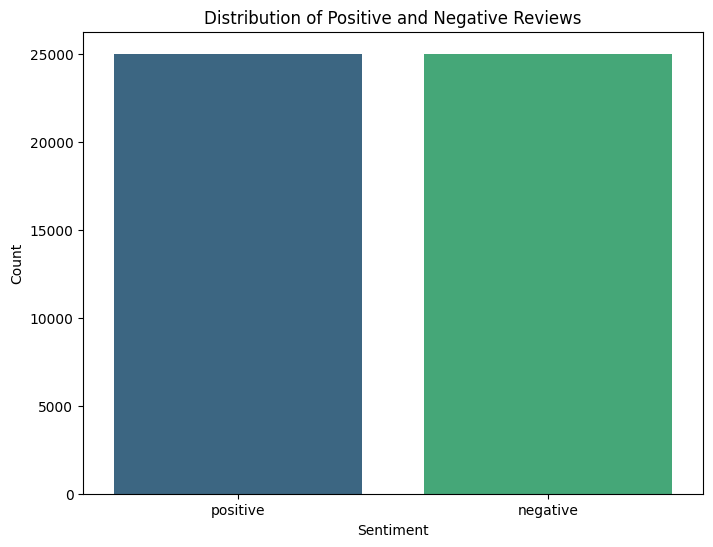

In [ ]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='sentiment', data=df, palette='viridis', legend=False)
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

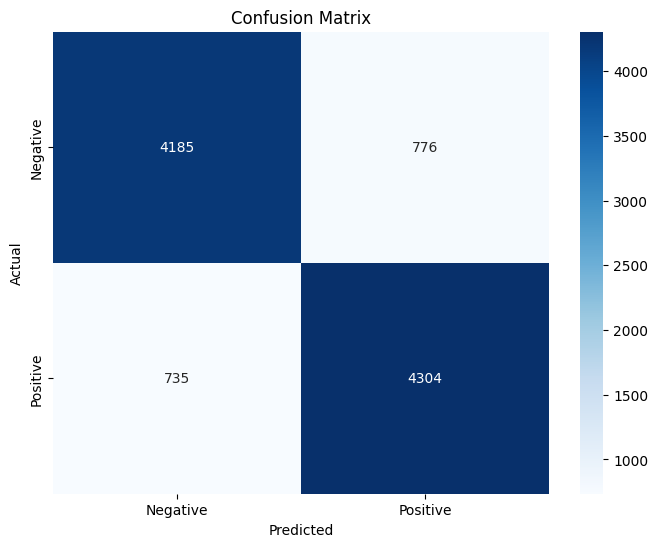

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

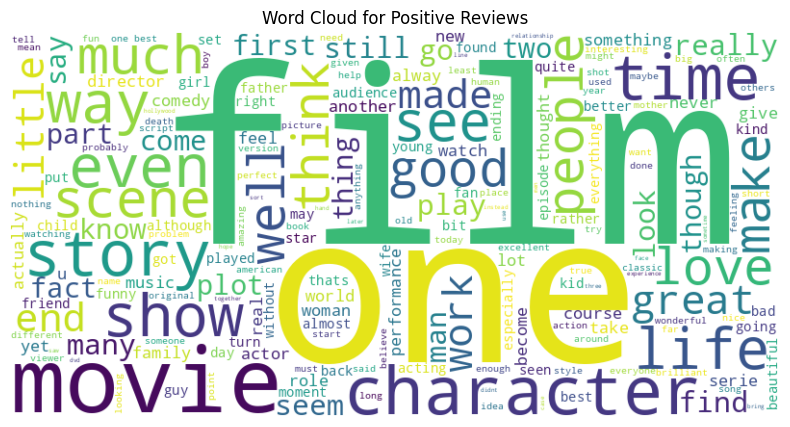

In [ ]:
# Word Cloud for Positive Reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

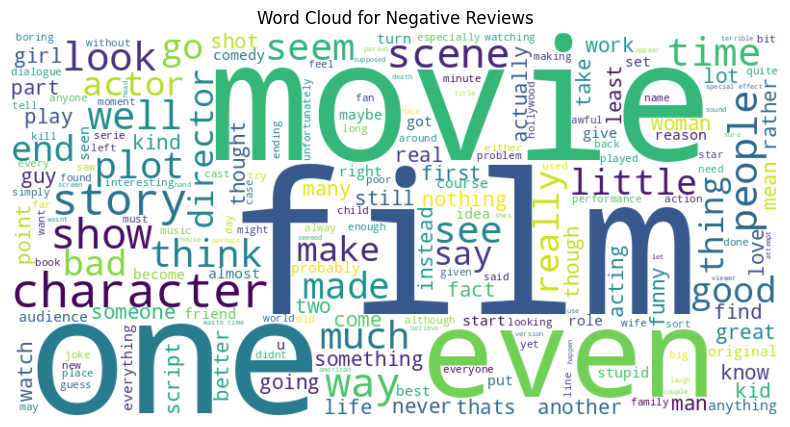

In [ ]:
# Word Cloud for Negative Reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [ ]:
sample_review = input("Enter a sample review: ")
sample_tfidf = tfidf.transform([sample_review])
predicted_sentiment = nb_model.predict(sample_tfidf)[0]
print(f"User Review: {sample_review[:100]}...")
print(f"Predicted Sentiment: {predicted_sentiment}")

Enter a sample review: I'm a big Mission Impossible fan, and I was really excited and looking forward to seeing this movie. Unfortunately, I found it to be really boring with lots of talking and multiple times the characters are just standing around talking and planning stuff out , or discussing things (I feel like a whole hour could have been cut out) . There was a lot talking, but not a lot being said . There wasn't a lot of action, or humor. There wasn't any suspense. It all felt pointless to me, and was missing everything that made the first movie special.  In my opinion, The beginning was the best part of the movie, but the middle and ending was all pretty boring. And then it just ends lol . Honestly, I'd rather just re-watch the first movie, because that was better :(
User Review: I'm a big Mission Impossible fan, and I was really excited and looking forward to seeing this movie....
Predicted Sentiment: negative
